# 나이와 금액의 관계를 분석합니다.

### 라이브러리 임포트

In [60]:
# =============
# imports
# =============
# import data_edit_tools
import pandas as pd
import numpy as np

# import Visualization tools
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# import machinelearning tools
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import joblib

## 데이터 불러오기

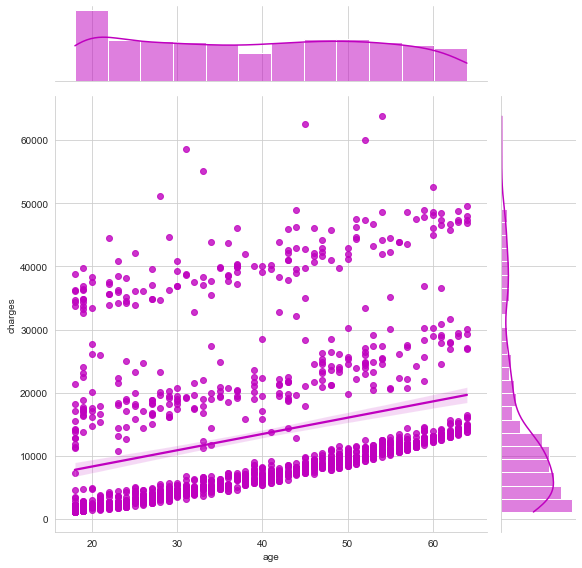

In [61]:
insurance_raw_df = pd.read_csv("./Dataset/insurance.csv")

def show_joinplot_graph(data, x_type, y_type, kind="scatter" ,color="m", height=5, hue=None):
    sns.set_style("whitegrid")
    sns.jointplot(x=f"{x_type}", y=f"{y_type}", data=data, color=f"{color}", height=height, kind=f"{kind}", hue=hue)
    plt.show()

show_joinplot_graph(data=insurance_raw_df, x_type = "age", y_type = "charges", color="m", height=8, kind="reg")

그래프를 보면 데이터가 많이 몰집되어있는 1개의 큰 선과 2개의 대이터가 넓게 분포되어있는 선이 있는것을 확인할수 있습니다.
또한 회귀분석을 통해 나이가 들면 들수록 점점 보험료가 증가되는사실을 확인할수 있습니다.

하지만, 이러한 데이터 양상이 아닌 나이에 따라 보혐금액을 예측하는 회귀분석적인 측면에서 위 결과를 보면 해당 선이 회귀분석결과로선
부적합하다는걸 알수 있습니다.

따라서 우리는 전체 데이터가 아닌 다른 방법으로 회귀분석을 수행해보고자 합니다.

## 회귀분석

### 담배를 피는 여부에 따라 분류

"Raw_Data_Visualization.ipynb" 노트북에서 저희는 흡연여부에 따라 위 데이터의 선형관계가 바뀌는것을 확인해 보았습니다.
위 그래프를 다시 시각화해보죠,

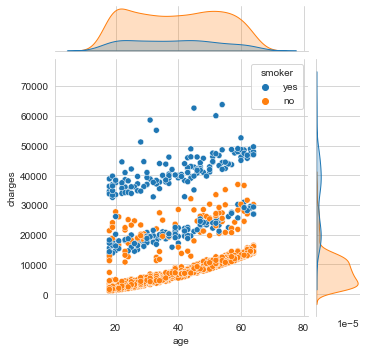

In [62]:
show_joinplot_graph(data=insurance_raw_df, x_type = "age", y_type = "charges", color="m", height=5, hue="smoker")

위 그래프를 통해 흡연여부에 따른 선형관계가 바뀐다는 사실을 확인해볼수 있습니다. 이제 본격적으로 회귀분석을 수행해보도록 하겠습니다.

#### 회귀분석을 위해 담배를 피지 않는사람과 피는사람의 분류

In [63]:
smoker_age = []
smoker_charges = []
no_smoker_age = []
no_smoker_charges = []

raw_age_ls = list(insurance_raw_df["age"])
raw_charges_ls = list(insurance_raw_df["charges"])
raw_smoker_ls = list(insurance_raw_df["smoker"])
for raw_index in range(len(insurance_raw_df)):
    if raw_smoker_ls[raw_index] == "yes":
        smoker_age.append(raw_age_ls[raw_index])
        smoker_charges.append(raw_charges_ls[raw_index])
    else:
        no_smoker_age.append(raw_age_ls[raw_index])
        no_smoker_charges.append(raw_charges_ls[raw_index])

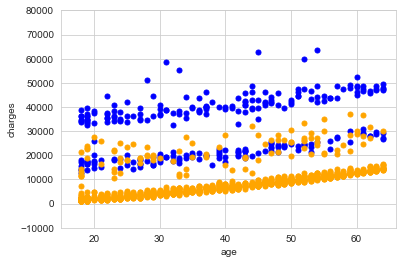

In [64]:
plt.scatter(x=smoker_age, y=smoker_charges, color="blue", s=25)
plt.scatter(x=no_smoker_age, y=no_smoker_charges, color="orange", s=25)
plt.xlabel("age")
plt.ylabel("charges")
plt.xlim(15, 66)
plt.ylim(-10000, 80000)
plt.show()

잘 분류가 된것 같습니다. 이제 각각을 훈련해보죠,

In [65]:
smoker_lr = LinearRegression()
no_smoker_lr = LinearRegression()

In [66]:
smoker_age = np.array(smoker_age)
smoker_charges = np.array(smoker_charges)
no_smoker_age = np.array(no_smoker_age)
no_smoker_charges = np.array(no_smoker_charges)

In [67]:
smoker_train_input, smoker_test_input, smoker_train_target, smoker_test_target = train_test_split(smoker_age, smoker_charges, random_state=42)

no_smoker_train_input, no_smoker_test_input, no_smoker_train_target, no_smoker_test_target = train_test_split(no_smoker_age, no_smoker_charges, random_state=42)

smoker_train_input = smoker_train_input.reshape(-1,1)
smoker_test_input = smoker_test_input.reshape(-1,1)
no_smoker_train_input = no_smoker_train_input.reshape(-1,1)
no_smoker_test_input = no_smoker_test_input.reshape(-1,1)

In [68]:
smoker_lr.fit(smoker_train_input, smoker_train_target)
no_smoker_lr.fit(no_smoker_train_input, no_smoker_train_target)

LinearRegression()

In [69]:
print(smoker_lr.score(smoker_test_input, smoker_test_target))
print(no_smoker_lr.score(no_smoker_test_input, no_smoker_test_target))

0.11391971475416496
0.43924377749782395


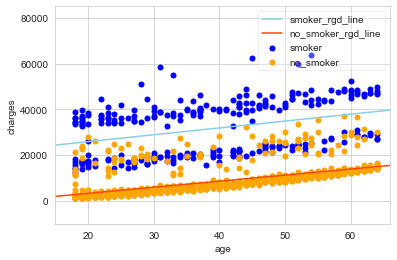

In [70]:
# point = np.arange(15,66)
plt.scatter(x=smoker_age, y=smoker_charges, color="blue", s=25, label="smoker")

plt.scatter(x=no_smoker_age, y=no_smoker_charges, color="orange", s=25, label="no_smoker")
plt.plot([15, 66], [15*smoker_lr.coef_ + smoker_lr.intercept_, 66*smoker_lr.coef_+ smoker_lr.intercept_], color="skyblue", label="smoker_rgd_line")
plt.plot([15,66], [15*no_smoker_lr.coef_ + no_smoker_lr.intercept_, 66*no_smoker_lr.coef_+ no_smoker_lr.intercept_], color="orangered", label="no_smoker_rgd_line")
plt.xlabel("age")
plt.ylabel("charges")
plt.xlim(15, 66)
plt.ylim(-10000, 85000)
plt.legend(framealpha=0.3, frameon=True, loc="upper right")
plt.show()

In [71]:
joblib.dump(smoker_lr, "./models/age_and_charges/smoker_linear_regression_model.pkl")
joblib.dump(no_smoker_lr, "./models/age_and_charges/no_smoker_linear_regression_model.pkl")

['./models/age_and_charges/no_smoker_linear_regression_model.pkl']